# Labelling Data

Labelling data is laborious. We spent months reading abstracts by hand.

[pic]

Each document was coded by hand by at least two independent coders. All disagreements

In [1]:
import os
os.chdir('../../../')

A sample of documents we labelled are also included (for demonstration purposes here with a subset of the most common labels).

In [2]:
import pandas as pd
labels = pd.read_feather('data/labels.feather')
print(labels.shape)
labels.head()

(1500, 16)


,id,title,abstract,INCLUDE,4 - 1. Economic instruments,4 - 2. Regulatory Instruments,"4 - 3. Information, education and training","4 - 4. Governance, strategies and targets",4 - 5. Agreements,8 - 01. AFOLU,8 - 02. Buildings,8 - 03. Industry,8 - 04. Energy,8 - 05. Transport,8 - 06. Waste,8 - 15. Cross-sectoral
0,W1980952752,Functional response of U.S. grasslands to the ...,Grasslands across the United States play a key...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,W2340763403,Multiobjective optimization using nondominated...,For energy conservation and CO2 emission reduc...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0
2,W2786973693,Assessment of Future Whole-System Value of Lar...,This paper analyses the impacts and benefits o...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,W2111894660,Biofuel Plantations on Forested Lands: Double ...,The growing demand for biofuels is promoting t...,1.0,0.0,0.0,0.0,2.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN
4,W2921136658,When climate change is missing: Media discours...,One of the EU's main decarbonization goals is ...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Inclusion

`INCLUDE` is a binary label that takes the value of 1 when a document was included (meaning that it deals with policy instruments of some sort)

<Axes: xlabel='INCLUDE'>

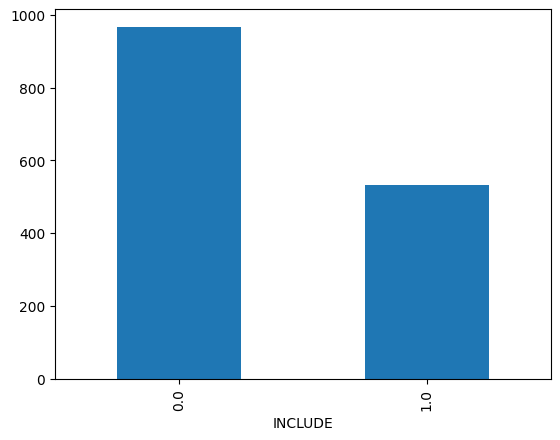

In [3]:
import matplotlib.pyplot as plt
labels.groupby('INCLUDE')['id'].count().plot.bar()

## Policy Instrument Type

Policy instrument types are denoted by columns beginning with the prefix `4 -`. Taken together, they can be seen as a multilabel task (each document can be zero or more policy instruments)

<Axes: >

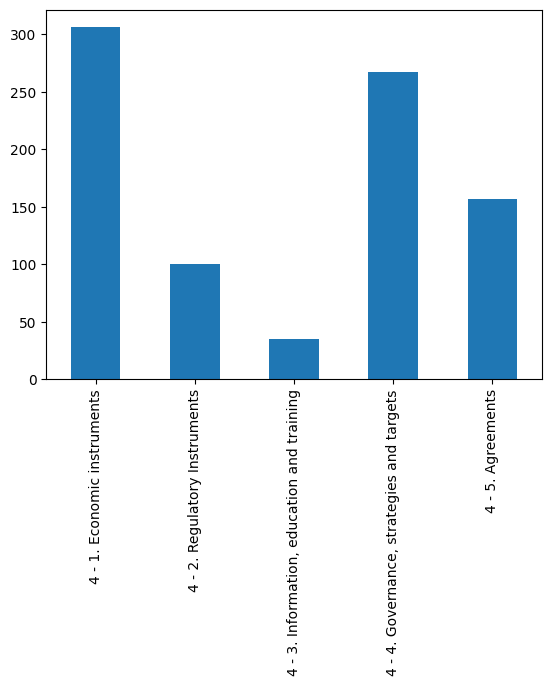

In [4]:
instruments = [x for x in labels.columns if "4 -" in x]
labels[instruments].sum().plot.bar()

## Sector

Sectors are denoted by columns beginning with the prefix `4 -`. They can also be seen as a multilabel task (each document can be zero or more sectors)

<Axes: >

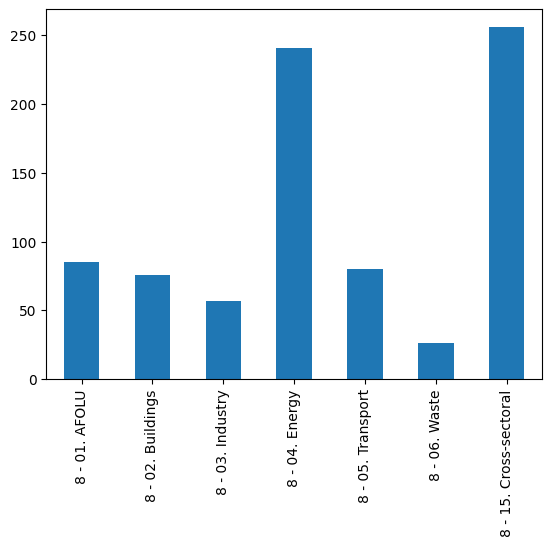

In [5]:
sectors = [x for x in labels.columns if "8 -" in x]
labels[sectors].sum().plot.bar()

Documents that are relevant usually mention 1 or more specific instrument types in 1 or more sectors (cross-sectoral refers to instruments that simply talk about reducing emissions in general)

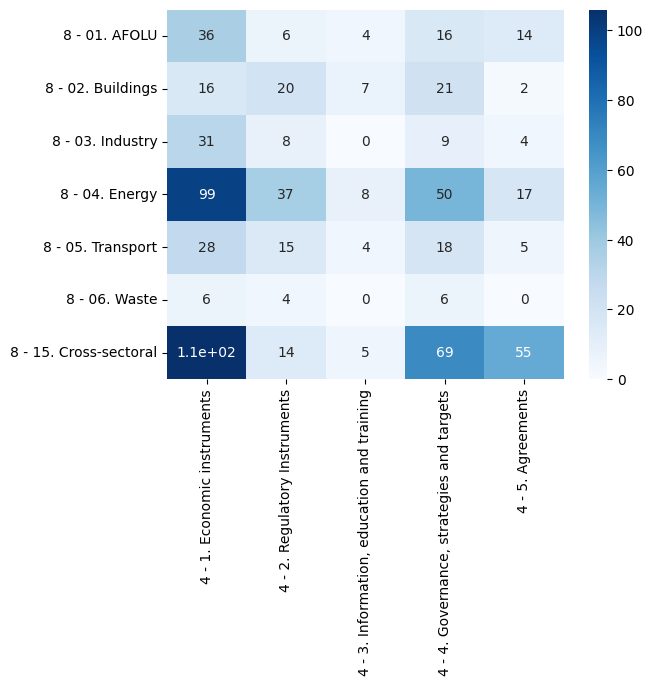

In [6]:
import numpy as np
import seaborn as sns
m = np.zeros((len(sectors),len(instruments)))
for i, sec in enumerate(sectors):
  for j, inst in enumerate(instruments):
    m[i,j] = labels[(labels[sec]==1) & (labels[inst]==1)].shape[0]
sns.heatmap(
  m,
  xticklabels=instruments,
  yticklabels=sectors,
  cmap='Blues',
  annot=True
)
plt.show()